In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-history-of-baseball/home_game.csv
/kaggle/input/the-history-of-baseball/team.csv
/kaggle/input/the-history-of-baseball/team_franchise.csv
/kaggle/input/the-history-of-baseball/hashes.txt
/kaggle/input/the-history-of-baseball/team_half.csv
/kaggle/input/the-history-of-baseball/pitching_postseason.csv
/kaggle/input/the-history-of-baseball/manager_award.csv
/kaggle/input/the-history-of-baseball/fielding.csv
/kaggle/input/the-history-of-baseball/player_award_vote.csv
/kaggle/input/the-history-of-baseball/appearances.csv
/kaggle/input/the-history-of-baseball/manager.csv
/kaggle/input/the-history-of-baseball/database.sqlite
/kaggle/input/the-history-of-baseball/manager_half.csv
/kaggle/input/the-history-of-baseball/batting.csv
/kaggle/input/the-history-of-baseball/readme.txt
/kaggle/input/the-history-of-baseball/fielding_outfield.csv
/kaggle/input/the-history-of-baseball/college.csv
/kaggle/input/the-history-of-baseball/postseason.csv
/kaggle/input/the-history-of-baseball/p

In [2]:
pd.set_option('display.max_columns', None)
pitchers=pd.read_csv('/kaggle/input/pitching/pitching2.csv').drop(columns='Unnamed: 0')
pitchers

,playerID,stint,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,IP,inducted,percent,threshold,votedBy,year,years
0,newsobo01,39.0,211.0,222.0,600.0,483.0,246.0,31.0,21.0,3769.0,1664.0,206.0,1732.0,2082.0,0.265172,3.983685,0.0,60.0,61.0,7.0,16467.0,71.0,1908.0,0.0,0.0,0.0,3759.333333,N,0.094118,0.750000,BBWAA,1973.0,13.0
1,johnto01,30.0,288.0,231.0,760.0,700.0,162.0,46.0,4.0,4783.0,1749.0,302.0,1259.0,2245.0,0.267500,3.341802,102.0,187.0,98.0,16.0,19692.0,22.0,2017.0,0.0,0.0,0.0,4710.333333,N,0.317254,0.751391,BBWAA,2009.0,15.0
2,kaatji01,31.0,283.0,237.0,898.0,625.0,180.0,31.0,18.0,4620.0,1738.0,395.0,1083.0,2461.0,0.272143,3.452726,116.0,128.0,122.0,6.0,19021.0,102.0,2038.0,0.0,0.0,0.0,4530.333333,N,0.295508,0.751773,BBWAA,2003.0,15.0
3,ryanno01,27.0,324.0,292.0,807.0,773.0,222.0,61.0,3.0,3923.0,1911.0,321.0,2795.0,5714.0,0.204444,3.193279,78.0,277.0,158.0,33.0,22575.0,13.0,2178.0,0.0,0.0,0.0,5386.000000,Y,0.987928,0.750503,BBWAA,1999.0,1.0
4,carltst01,31.0,329.0,244.0,741.0,709.0,254.0,55.0,2.0,4672.0,1864.0,414.0,1833.0,4136.0,0.250741,3.215436,150.0,183.0,53.0,90.0,21683.0,13.0,2130.0,0.0,0.0,0.0,5217.333333,Y,0.956140,0.750000,BBWAA,1994.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,ruckena01,10.0,134.0,134.0,336.0,272.0,186.0,38.0,14.0,2089.0,639.0,41.0,701.0,1217.0,0.243000,2.421134,0.0,43.0,73.0,2.0,9625.0,60.0,817.0,0.0,0.0,0.0,2375.333333,N,0.064378,0.751073,BBWAA,1946.0,7.0
375,whitewi01,10.0,229.0,166.0,403.0,401.0,394.0,36.0,0.0,3440.0,896.0,65.0,496.0,1041.0,0.252000,2.276251,0.0,168.0,68.0,0.0,14829.0,2.0,1844.0,0.0,0.0,0.0,3542.666667,N,0.019337,0.751381,BBWAA,1977.0,3.0
376,pearsmo01,10.0,100.0,61.0,224.0,191.0,94.0,5.0,4.0,1392.0,635.0,82.0,740.0,703.0,0.258000,3.997435,0.0,43.0,6.0,1.0,6259.0,24.0,721.0,0.0,0.0,0.0,1429.666667,N,0.003759,0.751880,BBWAA,1958.0,1.0
377,coaklan01,11.0,58.0,59.0,150.0,124.0,87.0,11.0,3.0,1021.0,280.0,9.0,314.0,428.0,0.289000,2.350016,0.0,15.0,26.0,2.0,2701.0,24.0,436.0,0.0,0.0,0.0,1072.333333,N,0.003817,0.751908,BBWAA,1938.0,1.0


In [3]:
names=pd.read_csv('/kaggle/input/the-history-of-baseball/player.csv')
names['name']=names['name_first']+' '+names['name_last']
names=names[['player_id','name']]
names=names.rename(columns={'player_id':'playerID'})
names=names[names['playerID'].isin(pitchers['playerID'].tolist())]
pitchers=pitchers.join(names.set_index(['playerID']), on='playerID')
pitchers

,playerID,stint,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,IP,inducted,percent,threshold,votedBy,year,years,name
0,newsobo01,39.0,211.0,222.0,600.0,483.0,246.0,31.0,21.0,3769.0,1664.0,206.0,1732.0,2082.0,0.265172,3.983685,0.0,60.0,61.0,7.0,16467.0,71.0,1908.0,0.0,0.0,0.0,3759.333333,N,0.094118,0.750000,BBWAA,1973.0,13.0,Bobo Newsom
1,johnto01,30.0,288.0,231.0,760.0,700.0,162.0,46.0,4.0,4783.0,1749.0,302.0,1259.0,2245.0,0.267500,3.341802,102.0,187.0,98.0,16.0,19692.0,22.0,2017.0,0.0,0.0,0.0,4710.333333,N,0.317254,0.751391,BBWAA,2009.0,15.0,Tommy John
2,kaatji01,31.0,283.0,237.0,898.0,625.0,180.0,31.0,18.0,4620.0,1738.0,395.0,1083.0,2461.0,0.272143,3.452726,116.0,128.0,122.0,6.0,19021.0,102.0,2038.0,0.0,0.0,0.0,4530.333333,N,0.295508,0.751773,BBWAA,2003.0,15.0,Jim Kaat
3,ryanno01,27.0,324.0,292.0,807.0,773.0,222.0,61.0,3.0,3923.0,1911.0,321.0,2795.0,5714.0,0.204444,3.193279,78.0,277.0,158.0,33.0,22575.0,13.0,2178.0,0.0,0.0,0.0,5386.000000,Y,0.987928,0.750503,BBWAA,1999.0,1.0,Nolan Ryan
4,carltst01,31.0,329.0,244.0,741.0,709.0,254.0,55.0,2.0,4672.0,1864.0,414.0,1833.0,4136.0,0.250741,3.215436,150.0,183.0,53.0,90.0,21683.0,13.0,2130.0,0.0,0.0,0.0,5217.333333,Y,0.956140,0.750000,BBWAA,1994.0,1.0,Steve Carlton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,ruckena01,10.0,134.0,134.0,336.0,272.0,186.0,38.0,14.0,2089.0,639.0,41.0,701.0,1217.0,0.243000,2.421134,0.0,43.0,73.0,2.0,9625.0,60.0,817.0,0.0,0.0,0.0,2375.333333,N,0.064378,0.751073,BBWAA,1946.0,7.0,Nap Rucker
375,whitewi01,10.0,229.0,166.0,403.0,401.0,394.0,36.0,0.0,3440.0,896.0,65.0,496.0,1041.0,0.252000,2.276251,0.0,168.0,68.0,0.0,14829.0,2.0,1844.0,0.0,0.0,0.0,3542.666667,N,0.019337,0.751381,BBWAA,1977.0,3.0,Will White
376,pearsmo01,10.0,100.0,61.0,224.0,191.0,94.0,5.0,4.0,1392.0,635.0,82.0,740.0,703.0,0.258000,3.997435,0.0,43.0,6.0,1.0,6259.0,24.0,721.0,0.0,0.0,0.0,1429.666667,N,0.003759,0.751880,BBWAA,1958.0,1.0,Monte Pearson
377,coaklan01,11.0,58.0,59.0,150.0,124.0,87.0,11.0,3.0,1021.0,280.0,9.0,314.0,428.0,0.289000,2.350016,0.0,15.0,26.0,2.0,2701.0,24.0,436.0,0.0,0.0,0.0,1072.333333,N,0.003817,0.751908,BBWAA,1938.0,1.0,Andy Coakley


# Heatmap for correlation

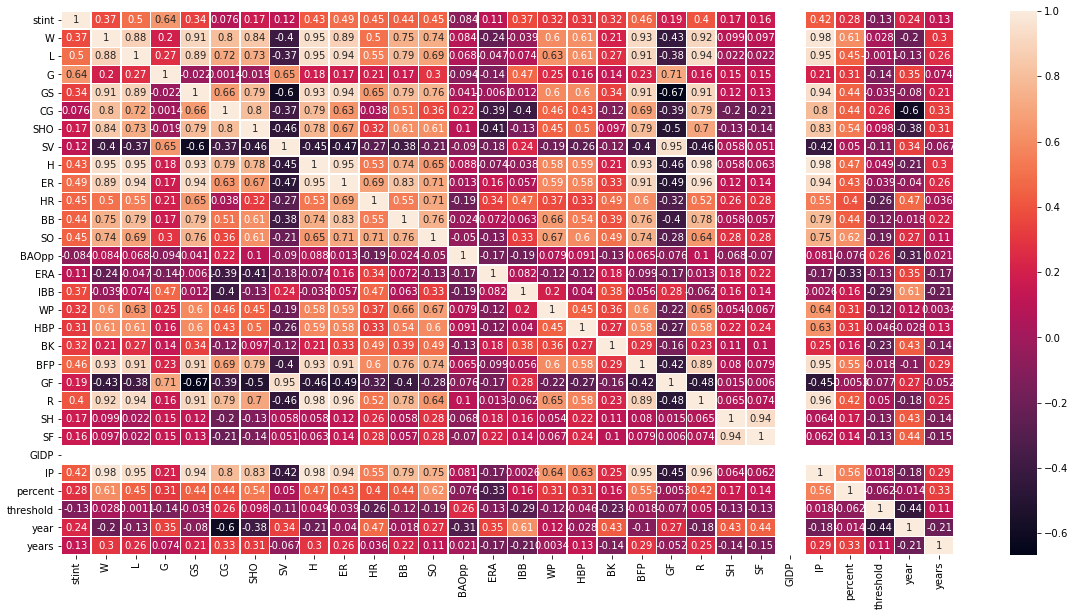

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(pitchers.corr(),annot=True,linewidth=0.5)

Heatmaps are great for analyzing how one variable relates to another, and being able to view all these relationships in one figure. Notice that the white blocks outline an identity matrix, because a variable is always going to be 100% correlated with itself. An example of two variables with a high ratio is hits and runs. The more hits a pitcher gives up, the more likely they are to give up runs. In certain instances one may avoid letting up runs, but over a long career they are going to be very closely correlated. An example of two variables with a low ratio is saves and innings pitched. Saves are typicaly reserved for a closing pitcher to come in and pitch the very last inning of the game. Thus, someone who is a closer will not rack up many innings pitched, and vice versa.

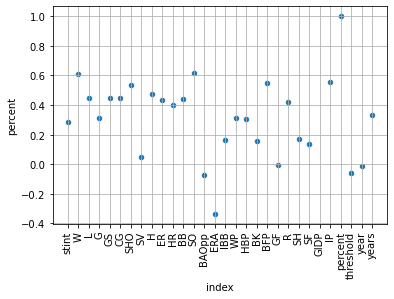

In [5]:
df=pd.DataFrame(pitchers.corr()['percent']).reset_index()
df['Beat Threshold']=abs(df['percent'])>0.45
df.plot(x='index',y='percent',kind='scatter',rot=90,grid=True)

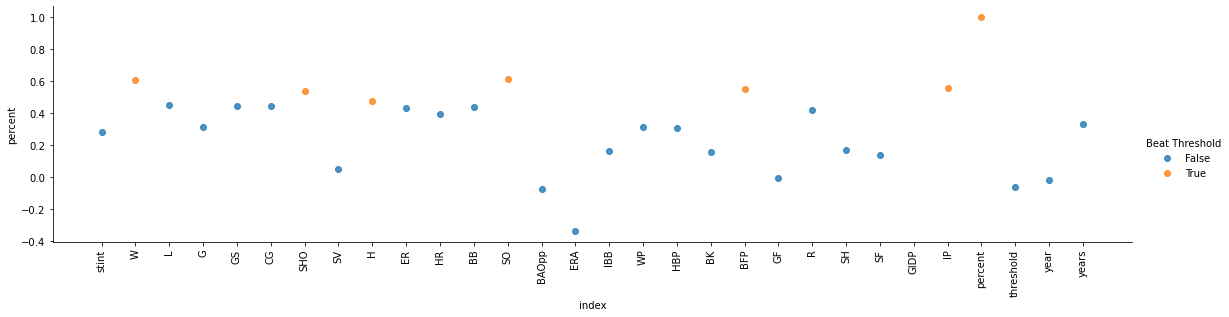

In [6]:
sns.lmplot(x='index', y="percent", data=df,hue='Beat Threshold',fit_reg=False,height=4,
           aspect=4).set_xticklabels(rotation=90)

I set a column declaring a threshold at +/- 0.4, so that helps separate each correlation by color whether it's inside or outside 0.4. This is an arbitrary threshold, but I figured it would be effective in showing the columns that are most correlated with percent.

W (wins), SHO (shutouts), H (hits), SO (strikeouts), BFP (batters faced by pitcher), IP (innings pitched)

# Correlation Plots

These should verify what we see in the heatmap and general correlation plot. SV, BAOpp, GF, and year should show no correlation between percent because their correlations are closest to zero.

Scatter plots are a great visualization tool to analyze how one variable influences another. For ease I created a method that, for each player, plots a given stat on the x axis and the HOF voting percentage on the y axis. The color of the point indicates whether or not they got inducted, and I created a for loop to add the player ID to each point.

These plots are a graphical representation between what we see in the heat map.

In [7]:
def scatter(attribute,show_annotations):
    if show_annotations==False:
        sns.lmplot(x=attribute, y="percent", data=pitchers,hue='inducted',fit_reg=False,size=8,aspect=2)
    else:
        p1=sns.lmplot(x=attribute, y="percent", data=pitchers,hue='inducted',fit_reg=False,size=8,aspect=2)
        ax = p1.axes[0,0]
        for i in range(len(pitchers)):
            ax.text(pitchers[attribute][i], pitchers['percent'][i],pitchers['name'][i],
                   fontsize='small',rotation=45)
        plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


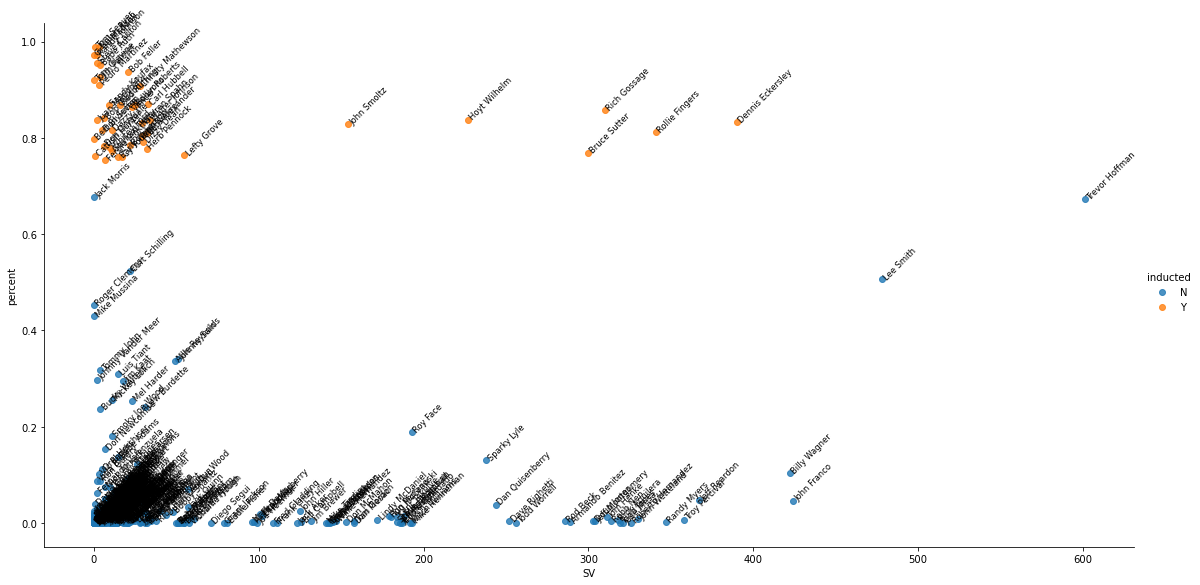

In [8]:
scatter('SV',True)

Saves are an interesting case because Trevor Hoffman has almost twice as many saves as Rich Gossage, but Gossage is the only one who's gotten the nod to the hall. (Trevor Hoffman would get in a couple years later, but he still had missed the cut when this data was collected).

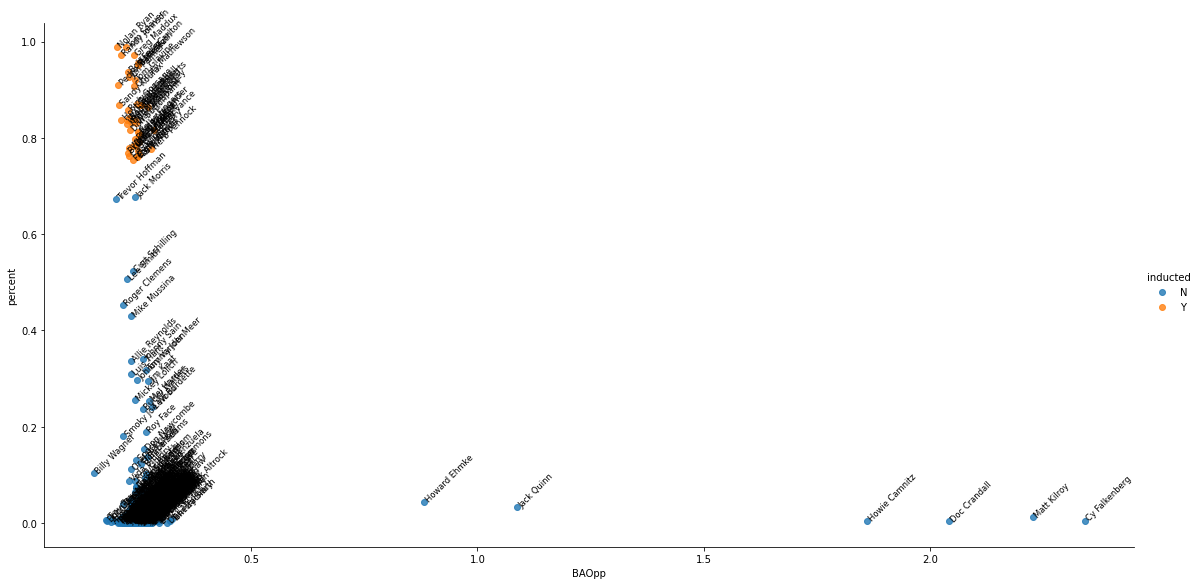

In [9]:
scatter('BAOpp',True)

Clearly some outliers in the data are making this one hard to visualize. Let's manually condense the x axis to get a better look.

In [10]:
pitchers[pitchers['BAOpp']>.4]

,playerID,stint,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,IP,inducted,percent,threshold,votedBy,year,years,name
20,quinnja01,25.0,247.0,218.0,756.0,444.0,243.0,28.0,57.0,4238.0,1433.0,102.0,860.0,1329.0,1.088333,3.289771,0.0,59.0,94.0,5.0,16493.0,216.0,1835.0,0.0,0.0,0.0,3920.333333,N,0.033835,0.751880,BBWAA,1960.0,4.0,Jack Quinn
139,planked01,17.0,326.0,194.0,623.0,529.0,410.0,69.0,23.0,3958.0,1174.0,41.0,1072.0,2246.0,0.808235,2.350263,0.0,87.0,196.0,6.0,18225.0,74.0,1569.0,0.0,0.0,0.0,4495.666667,Y,NaN,NaN,Old Timers,1946.0,7.0,Eddie Plank
142,galvipu01,19.0,364.0,310.0,705.0,689.0,646.0,57.0,2.0,6405.0,1910.0,122.0,745.0,1806.0,0.953571,2.863409,0.0,223.0,57.0,1.0,25234.0,17.0,3355.0,0.0,0.0,0.0,6003.333333,Y,NaN,NaN,Veterans,1965.0,1.0,Pud Galvin
163,ehmkeho01,17.0,166.0,166.0,427.0,339.0,199.0,20.0,14.0,2873.0,1174.0,103.0,1042.0,1030.0,0.881875,3.745923,0.0,28.0,137.0,8.0,12110.0,70.0,1425.0,0.0,0.0,0.0,2820.666667,N,0.044610,0.750929,BBWAA,1960.0,9.0,Howard Ehmke
182,bendech01,16.0,212.0,127.0,459.0,334.0,255.0,40.0,34.0,2645.0,823.0,40.0,712.0,1711.0,0.848125,2.455088,0.0,72.0,102.0,3.0,10124.0,109.0,1110.0,0.0,0.0,0.0,3017.000000,Y,NaN,NaN,Veterans,1953.0,16.0,Chief Bender
214,keefeti01,16.0,342.0,225.0,600.0,594.0,554.0,39.0,2.0,4439.0,1472.0,81.0,1220.0,2562.0,0.927857,2.624579,0.0,233.0,96.0,0.0,20975.0,7.0,2468.0,0.0,0.0,0.0,5047.666667,Y,NaN,NaN,Veterans,1964.0,2.0,Tim Keefe
232,brownmo01,16.0,239.0,130.0,481.0,332.0,271.0,55.0,49.0,2708.0,725.0,43.0,673.0,1375.0,2.186667,2.056846,0.0,59.0,63.0,4.0,12642.0,138.0,1044.0,0.0,0.0,0.0,3172.333333,Y,NaN,NaN,Old Timers,1949.0,9.0,Mordecai Brown
262,falkecy01,16.0,130.0,123.0,330.0,266.0,180.0,27.0,8.0,2090.0,678.0,23.0,690.0,1164.0,2.340714,2.682198,0.0,93.0,69.0,0.0,7939.0,48.0,960.0,0.0,0.0,0.0,2275.000000,N,0.004975,0.751244,BBWAA,1937.0,1.0,Cy Falkenberg
315,camniho01,13.0,133.0,106.0,326.0,236.0,137.0,20.0,15.0,1852.0,637.0,41.0,656.0,915.0,1.860000,2.749201,0.0,37.0,65.0,1.0,8341.0,74.0,855.0,0.0,0.0,0.0,2085.333333,N,0.004049,0.753036,BBWAA,1945.0,1.0,Howie Camnitz
334,cranddo01,13.0,102.0,62.0,302.0,134.0,91.0,9.0,25.0,1538.0,502.0,52.0,379.0,606.0,2.041818,2.921121,0.0,8.0,49.0,1.0,6355.0,145.0,669.0,0.0,0.0,0.0,1546.666667,N,0.003817,0.751908,BBWAA,1938.0,1.0,Doc Crandall


All of these are clearly errors in the data, an opponent batting averages should not be this high (anything over 1 is statstically impossible). Let's replace these with null values. 

In [11]:
for row in range(len(pitchers)):
    if pitchers['BAOpp'][row]>0.4:
        pitchers.iloc[row,14]=None
pitchers

,playerID,stint,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,IP,inducted,percent,threshold,votedBy,year,years,name
0,newsobo01,39.0,211.0,222.0,600.0,483.0,246.0,31.0,21.0,3769.0,1664.0,206.0,1732.0,2082.0,0.265172,3.983685,0.0,60.0,61.0,7.0,16467.0,71.0,1908.0,0.0,0.0,0.0,3759.333333,N,0.094118,0.750000,BBWAA,1973.0,13.0,Bobo Newsom
1,johnto01,30.0,288.0,231.0,760.0,700.0,162.0,46.0,4.0,4783.0,1749.0,302.0,1259.0,2245.0,0.267500,3.341802,102.0,187.0,98.0,16.0,19692.0,22.0,2017.0,0.0,0.0,0.0,4710.333333,N,0.317254,0.751391,BBWAA,2009.0,15.0,Tommy John
2,kaatji01,31.0,283.0,237.0,898.0,625.0,180.0,31.0,18.0,4620.0,1738.0,395.0,1083.0,2461.0,0.272143,3.452726,116.0,128.0,122.0,6.0,19021.0,102.0,2038.0,0.0,0.0,0.0,4530.333333,N,0.295508,0.751773,BBWAA,2003.0,15.0,Jim Kaat
3,ryanno01,27.0,324.0,292.0,807.0,773.0,222.0,61.0,3.0,3923.0,1911.0,321.0,2795.0,5714.0,0.204444,3.193279,78.0,277.0,158.0,33.0,22575.0,13.0,2178.0,0.0,0.0,0.0,5386.000000,Y,0.987928,0.750503,BBWAA,1999.0,1.0,Nolan Ryan
4,carltst01,31.0,329.0,244.0,741.0,709.0,254.0,55.0,2.0,4672.0,1864.0,414.0,1833.0,4136.0,0.250741,3.215436,150.0,183.0,53.0,90.0,21683.0,13.0,2130.0,0.0,0.0,0.0,5217.333333,Y,0.956140,0.750000,BBWAA,1994.0,1.0,Steve Carlton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,ruckena01,10.0,134.0,134.0,336.0,272.0,186.0,38.0,14.0,2089.0,639.0,41.0,701.0,1217.0,0.243000,2.421134,0.0,43.0,73.0,2.0,9625.0,60.0,817.0,0.0,0.0,0.0,2375.333333,N,0.064378,0.751073,BBWAA,1946.0,7.0,Nap Rucker
375,whitewi01,10.0,229.0,166.0,403.0,401.0,394.0,36.0,0.0,3440.0,896.0,65.0,496.0,1041.0,0.252000,2.276251,0.0,168.0,68.0,0.0,14829.0,2.0,1844.0,0.0,0.0,0.0,3542.666667,N,0.019337,0.751381,BBWAA,1977.0,3.0,Will White
376,pearsmo01,10.0,100.0,61.0,224.0,191.0,94.0,5.0,4.0,1392.0,635.0,82.0,740.0,703.0,0.258000,3.997435,0.0,43.0,6.0,1.0,6259.0,24.0,721.0,0.0,0.0,0.0,1429.666667,N,0.003759,0.751880,BBWAA,1958.0,1.0,Monte Pearson
377,coaklan01,11.0,58.0,59.0,150.0,124.0,87.0,11.0,3.0,1021.0,280.0,9.0,314.0,428.0,0.289000,2.350016,0.0,15.0,26.0,2.0,2701.0,24.0,436.0,0.0,0.0,0.0,1072.333333,N,0.003817,0.751908,BBWAA,1938.0,1.0,Andy Coakley


In [12]:
pitchers.corr()['BAOpp']

stint       -0.002075
W            0.039219
L            0.128391
G           -0.314908
GS           0.105839
CG           0.194148
SHO          0.041606
SV          -0.401013
H            0.196976
ER           0.159952
HR          -0.119725
BB          -0.060647
SO          -0.338413
BAOpp        1.000000
ERA          0.292359
IBB         -0.226837
WP          -0.216308
HBP         -0.090868
BK          -0.149541
BFP          0.050268
GF          -0.319402
R            0.184044
SH          -0.223753
SF          -0.227392
GIDP              NaN
IP           0.071920
percent     -0.207448
threshold    0.247875
year        -0.446754
years        0.117311
Name: BAOpp, dtype: float64

Now its correlation with percent of votes is -0.18, which shows a more negative relationship than its original -0.076, but this is not very significant and the criteria I set was to be at least 0.45.

/opt/conda/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


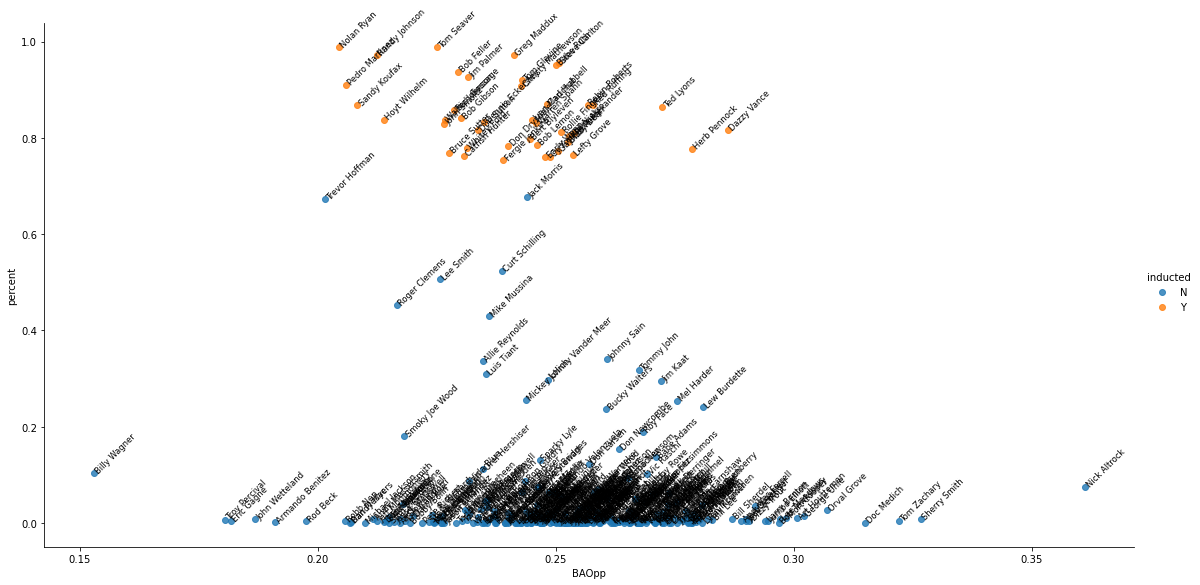

In [13]:
scatter('BAOpp',True)

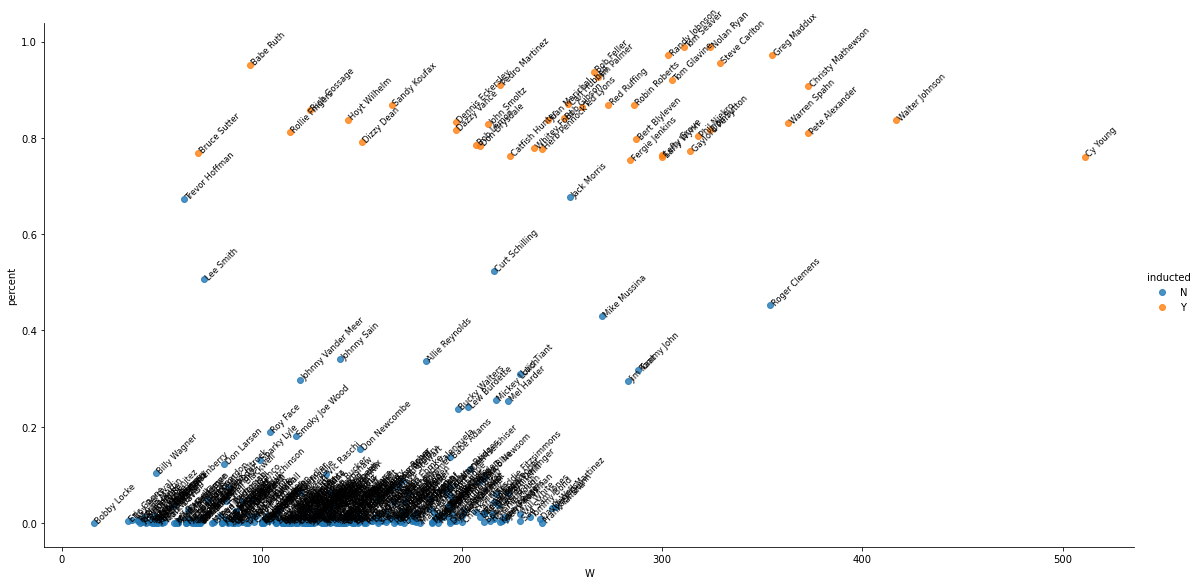

In [14]:
scatter('W',True)

Clearly a positive correlation here. There are some blue dots with a lot of wins, but in general once a player gets aa certain amount of wins it is highly likely that they will get into the hall of fame.

On another note, Roger Clemens show up a lot as a player with impressive stats, but not getting enough votes to get in. This is because he used steroids and some believe he should not be allowed in because of it.

In [15]:
pitchers_filtered=pitchers[pitchers['playerID'].isin(['clemero02'])].reset_index().drop(columns='index')

In [16]:
pitchers_filtered.to_csv('pitchers_filtered')